# IMPORTS : Packages and data

In [1]:
#Tous les packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()


from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
import sklearn.model_selection as ms
from lightgbm import LGBMClassifier
import xgboost as xgb
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.model_selection import StratifiedKFold

from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression


from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 

import nltk
from nltk.corpus import stopwords

from nltk.stem.snowball import EnglishStemmer

from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.pipeline import Pipeline

import pandas as pd
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion

from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from sklearn.model_selection import GridSearchCV
import numpy as np
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import auc

import sys

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [2]:
# The data 
data = pd.read_csv('train.csv')
data = data.set_index('id')

# I.Exploratory Analysis

In [4]:
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1804874 entries, 59848 to 6334010
Data columns (total 44 columns):
target                                 float64
comment_text                           object
severe_toxicity                        float64
obscene                                float64
identity_attack                        float64
insult                                 float64
threat                                 float64
asian                                  float64
atheist                                float64
bisexual                               float64
black                                  float64
buddhist                               float64
christian                              float64
female                                 float64
heterosexual                           float64
hindu                                  float64
homosexual_gay_or_lesbian              float64
intellectual_or_learning_disability    float64
jewish                                

,target,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,bisexual,black,...,parent_id,article_id,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count
count,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,405130.000000,405130.000000,405130.000000,405130.000000,...,1.026228e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06,1.804874e+06
mean,1.030173e-01,4.582099e-03,1.387721e-02,2.263571e-02,8.115273e-02,9.311271e-03,0.011964,0.003205,0.001884,0.034393,...,3.722687e+06,2.813597e+05,2.779269e-01,4.420696e-02,1.091173e-01,2.446167e+00,5.843688e-01,6.605974e-03,1.439019e+00,8.784694e+00
std,1.970757e-01,2.286128e-02,6.460419e-02,7.873156e-02,1.760657e-01,4.942218e-02,0.087166,0.050193,0.026077,0.167900,...,2.450261e+06,1.039293e+05,1.055313e+00,2.449359e-01,4.555363e-01,4.727924e+00,1.866589e+00,4.529782e-02,1.787041e+01,4.350086e+01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,6.100600e+04,2.006000e+03,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,7.960188e+05,1.601200e+05,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.222993e+06,3.321260e+05,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
75%,1.666667e-01,0.000000e+00,0.000000e+00,0.000000e+00,9.090909e-02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,5.775758e+06,3.662370e+05,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000,1.000000,1.000000,1.000000,...,6.333965e+06,3.995410e+05,1.020000e+02,2.100000e+01,3.100000e+01,3.000000e+02,1.870000e+02,1.000000e+00,1.866000e+03,4.936000e+03


In [5]:
pd.DataFrame({'pourcentage de null': data.isnull().sum()*100 / data.shape[0]}, index = data.columns)

,pourcentage de null
target,0.000000
comment_text,0.000000
severe_toxicity,0.000000
obscene,0.000000
identity_attack,0.000000
insult,0.000000
threat,0.000000
asian,77.553558
atheist,77.553558
bisexual,77.553558


We notice that it is mainly the columns about identity who are dealing with NA. Our model is based on the variable comment_text, so this not really a big deal for now.

In [7]:
#check on the % of no toxic comments 
data.sort_values(by = ('target')).target.value_counts(normalize = True)*100

0.000000    70.074919
0.166667     7.673721
0.200000     5.955651
0.300000     3.274356
0.400000     2.770997
0.500000     2.099648
0.600000     1.339429
0.100000     0.808422
0.700000     0.732627
0.800000     0.389445
1.000000     0.244117
0.833333     0.216082
0.142857     0.187825
0.111111     0.102611
0.900000     0.094688
0.750000     0.053078
0.625000     0.028700
0.666667     0.027537
0.687500     0.024600
0.714286     0.023270
0.125000     0.022827
0.857143     0.021553
0.562500     0.021553
0.650000     0.021276
0.587500     0.018838
0.272727     0.018007
0.250000     0.017785
0.575000     0.017674
0.642857     0.017619
0.675000     0.017619
              ...    
0.231884     0.000055
0.963061     0.000055
0.016667     0.000055
0.803242     0.000055
0.769912     0.000055
0.981651     0.000055
0.010324     0.000055
0.709924     0.000055
0.185514     0.000055
0.951271     0.000055
0.928322     0.000055
0.013902     0.000055
0.020158     0.000055
0.003331     0.000055
0.892148  

#### Total distribution of target (y)

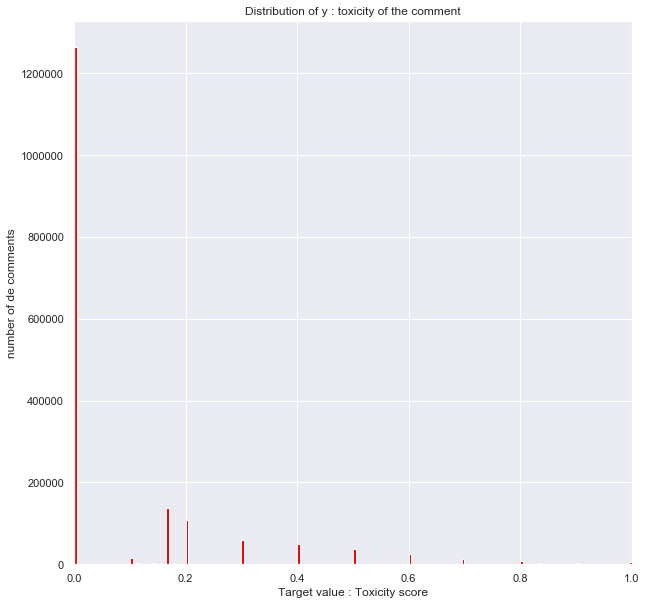

In [5]:
fig, ax = plt.subplots(figsize = (10, 10))
plt.hist(data.target, bins = 200, color = 'red')
plt.title('Distribution of y : toxicity of the comment')
plt.ylabel('number of de comments')
plt.xlabel('Target value : Toxicity score')
plt.xlim([-0.001, 1]);

We notice that the data is unbalanced. Especially in our case, where we will binarized our variable target (toxic if >= 0.5 and not toxic if < 0.5). We are going to make an undersampling or an oversampling to deal with this.

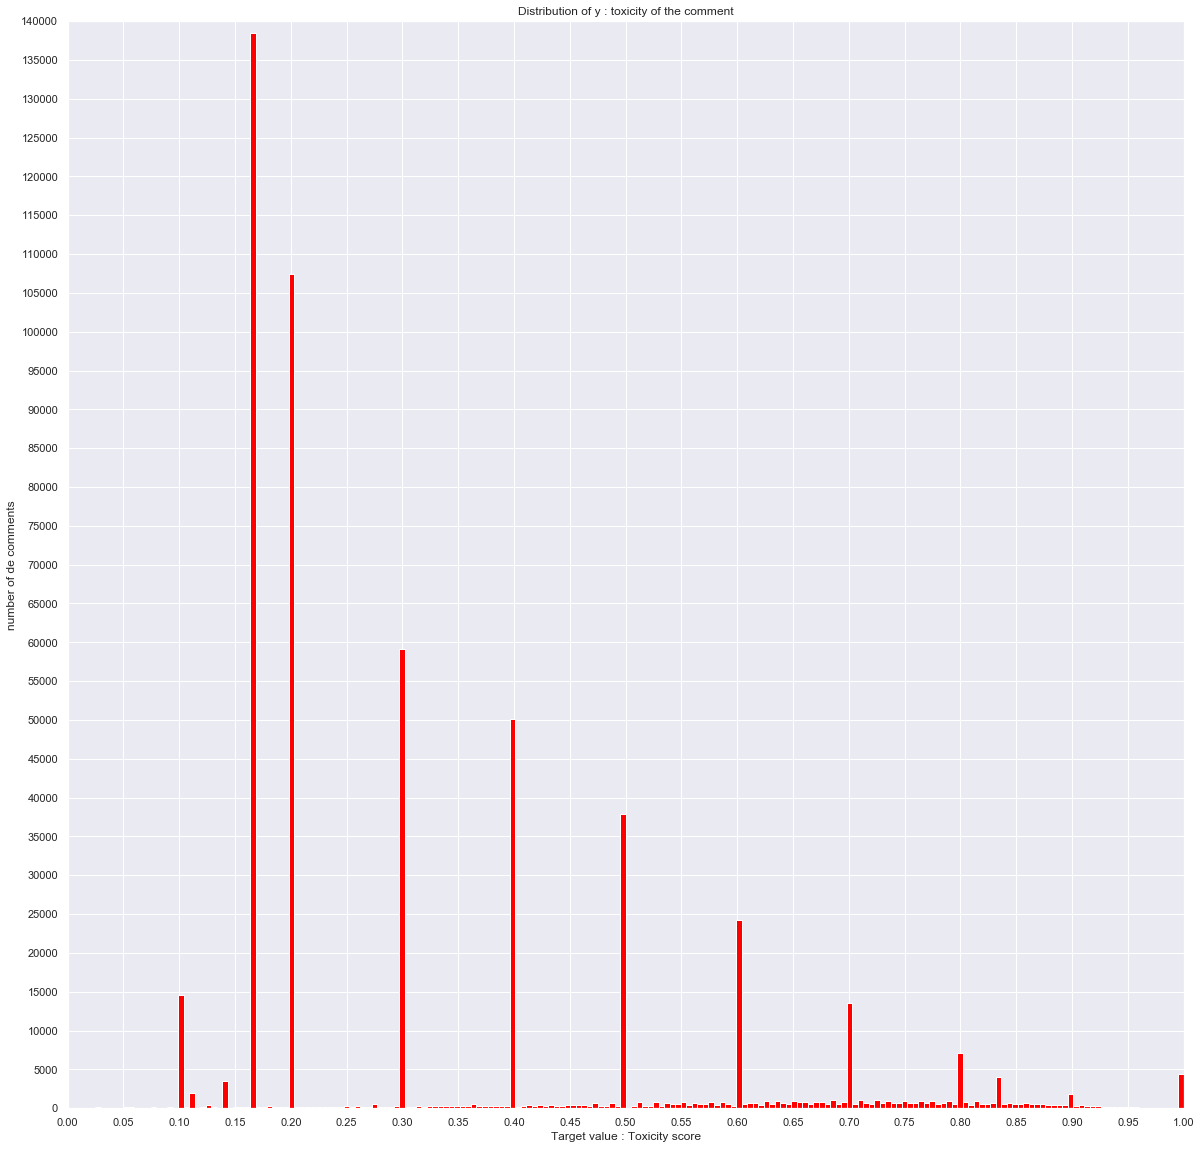

In [6]:
#Distribution of target without 0. 
fig, ax = plt.subplots(figsize = (20, 20))
plt.hist(data.target, range = [0.01, 1], bins = 200, color = 'red')
plt.title('Distribution of y : toxicity of the comment')
plt.xlabel('Target value : Toxicity score')
plt.ylabel('number of de comments')
plt.xlim([0, 1])
plt.ylim([0, 140000])
plt.xticks(np.arange(0, 1.001, 0.05))
plt.yticks(np.arange(0, 140001, 5000));

#### Relationship between target and rating

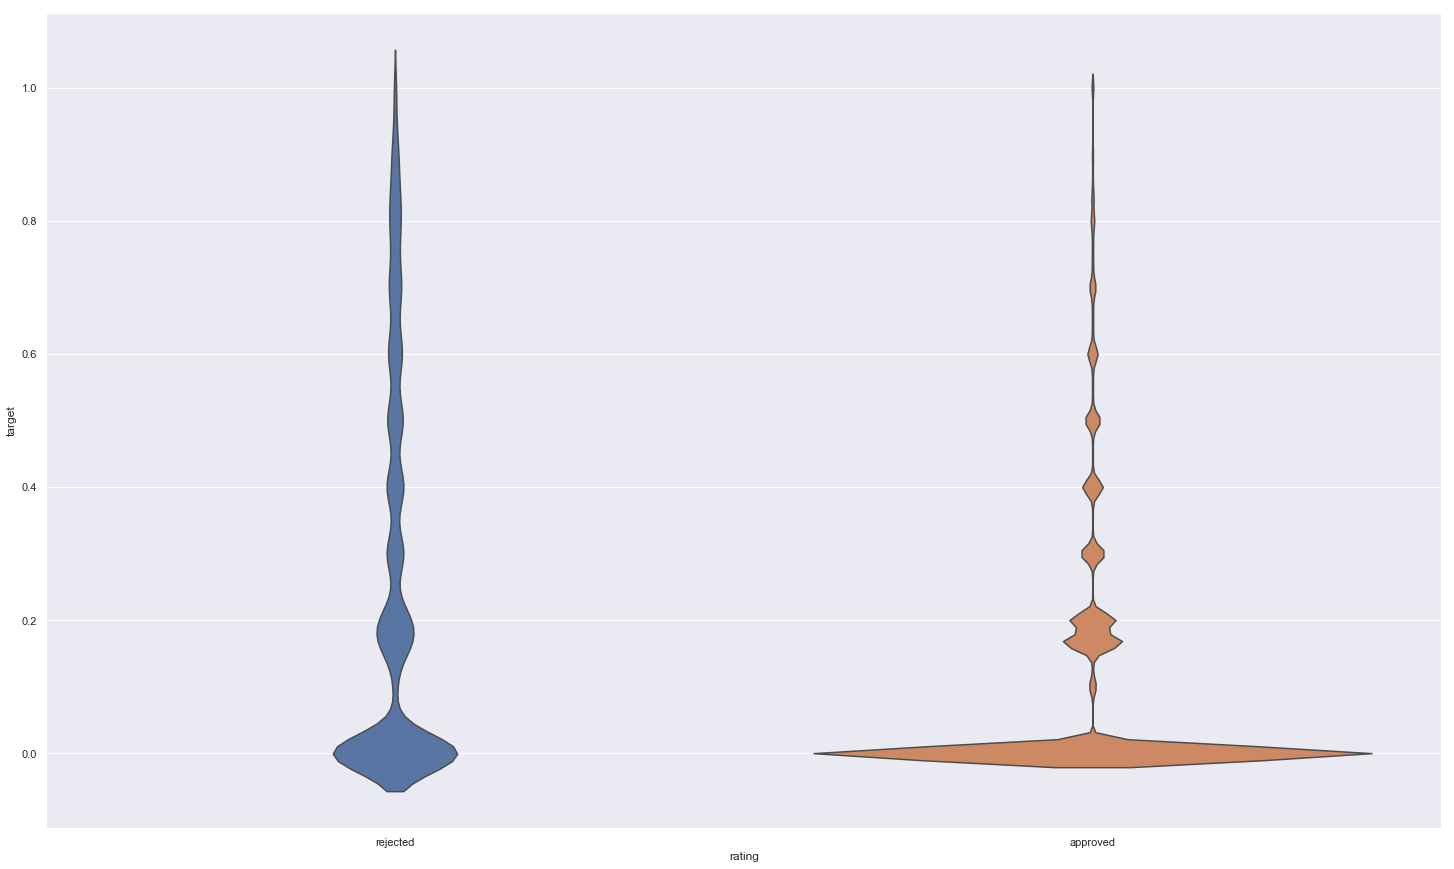

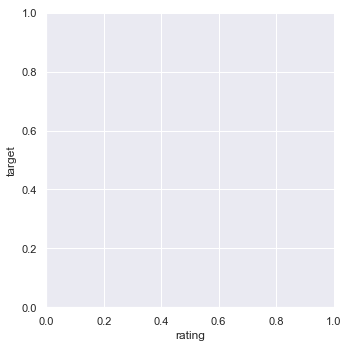

In [10]:
fig, ax = plt.subplots(figsize = (25,15))
sns.catplot(x = 'rating', y = 'target', data = data, kind = 'violin', ax = ax, inner = None);

We see that it is mainly the rating < 0.5 who are approved. This is going to influence our choice to binarize the target.

#### Size of comments

In [7]:
commentaires = data.comment_text.array

motsComm = [commentaires[i].split() for i in range(len(commentaires))]
motsComm[0]

['This',
 'is',
 'so',
 'cool.',
 "It's",
 'like,',
 "'would",
 'you',
 'want',
 'your',
 'mother',
 'to',
 'read',
 "this??'",
 'Really',
 'great',
 'idea,',
 'well',
 'done!']

#### Size of comments : Graph

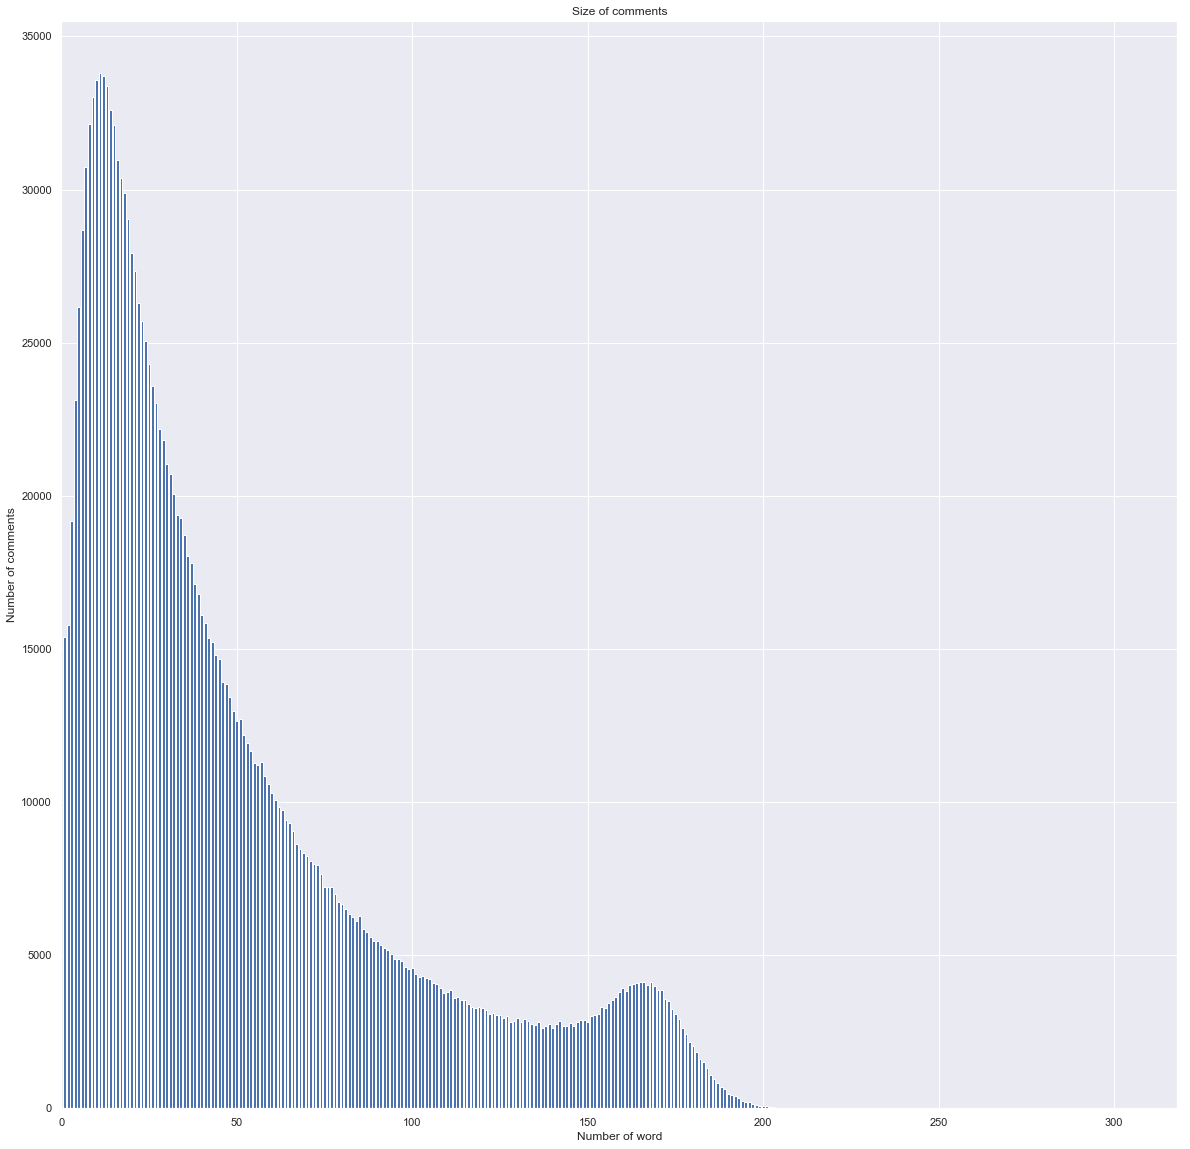

In [8]:
longComm = [len(com) for com in motsComm]
longComm.sort()
valeurs, counts = np.unique(longComm, return_counts = True)

fig, ax = plt.subplots(figsize = (20, 20))
plt.bar(valeurs, counts)
plt.xlabel('Number of word')
plt.ylabel('Number of comments')
plt.title('Size of comments')
plt.xlim([0, valeurs[-1] + 1]);

#### Correlation threat with other variables

Text(0.5,1,"Correlation of the variables with 'threat'")

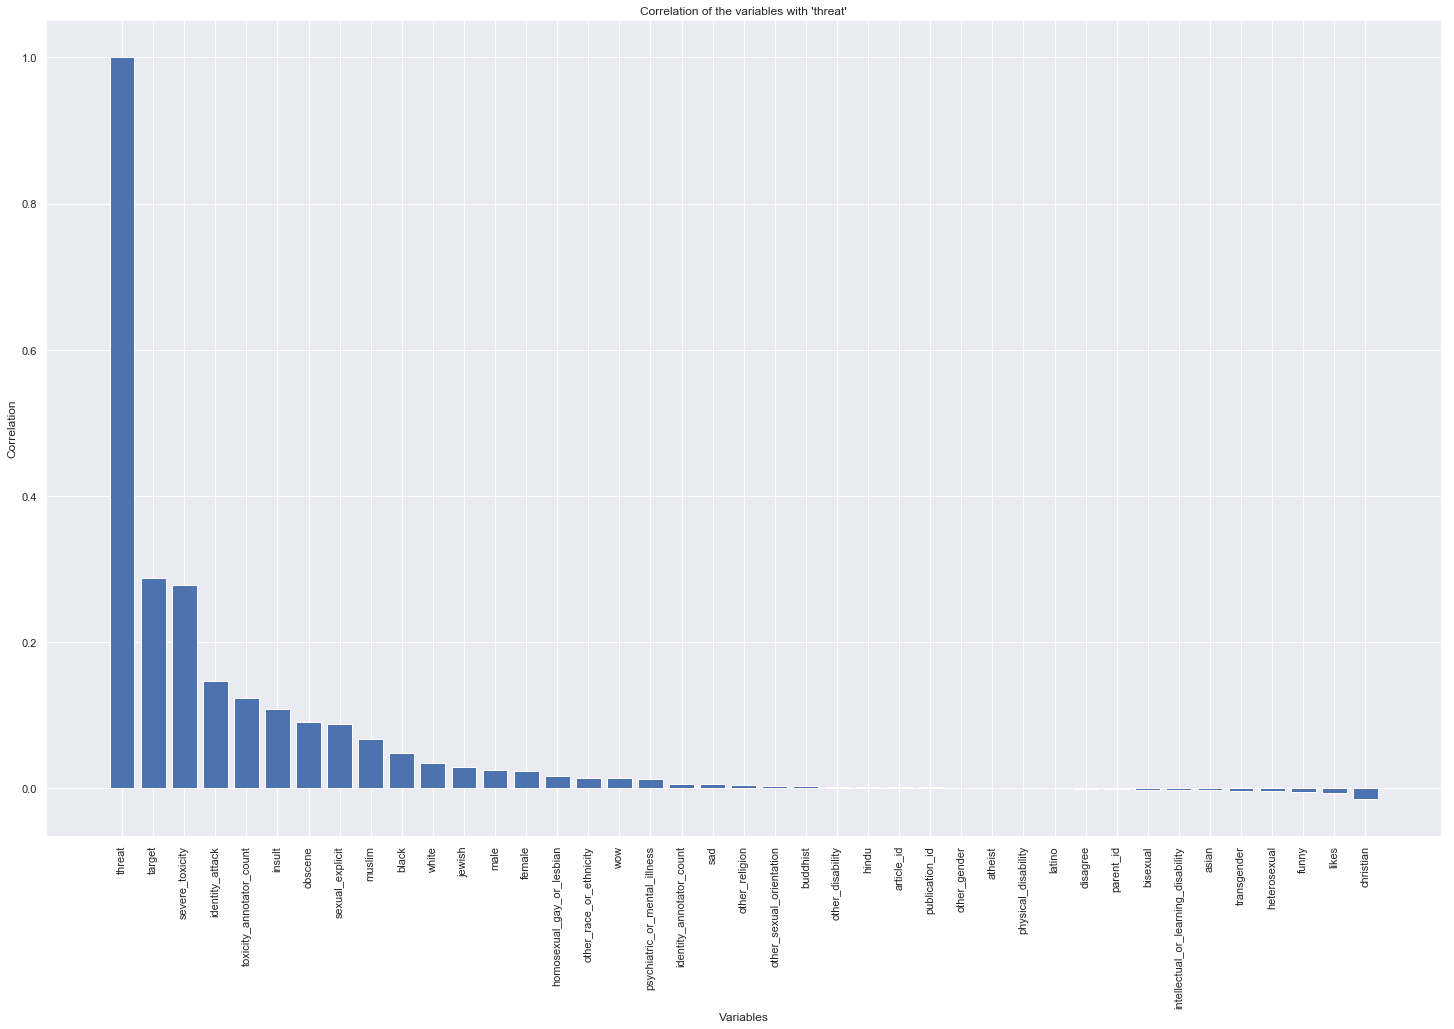

In [9]:

corrThreat = data.corr()['threat'][:]
corrThreat = corrThreat.sort_values(ascending = False)

fig, ax = plt.subplots(figsize = (25,15))
ax.bar(corrThreat.index, corrThreat)
plt.tick_params(axis = 'x', rotation = 90)
plt.xlabel('Variables')
plt.ylabel('Correlation')
plt.title('Correlation of the variables with \'threat\'')

# II. Text Mining and Pipeline

We binarize our variable Y with the label *[non toxique, toxique]* in order to do classification.

We also make an undersampling because our models with initial data predicted quite badly the category "toxic". That can be expected on the fact our data is strongly unbalanced.

In [6]:
# Undersampling on Python 
pos_events = data[data.target >= 0.5] # Commentaires considered as toxic
neg_events = data[data.target <= 0.5] # Commentaires considered as not toxic

#Permutation aléatoire des événements positifs et négatifs
pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
neg_events = neg_events.reindex(np.random.permutation(neg_events.index))

# Création des données sous-échantillonnées
taille = 50000
undersampled_data = pd.concat([neg_events.head(taille), pos_events.head(taille)])

from sklearn.model_selection import train_test_split
comments, comments_test, y_train, y_test = train_test_split(undersampled_data.comment_text, undersampled_data.target,
                                                            test_size=0.3, random_state=42)

target_cat_train = pd.cut(y_train, bins = 2, labels = ['non toxique', 'toxique'])

target_cat_test = pd.cut(y_test, bins = 2, labels = ['non toxique', 'toxique'])

### Preparation of the variable comments for TF IDF

Now, we are going to process our data text (comments_text) to use it in the most optimal way. Those are the preprocessing steps we are going to implemente :


- Tokenization
- Enlever les stopwords
- Utiliser Stemmer
- utiliser join pour avoir une structure pouvant être utilisé avec TF-IDF

Performing this simple manipulation on data can give us confidence that a significant amount of 'noise' in our data is removed which is likely to lead to better results during the data modeling stage.

Here we use the tokenization. Tokenization is the act of breaking up a sequence of strings into pieces such as words, keywords, phrases, symbols and other elements called tokens. Tokens can be individual words, phrases or even whole sentences. We clarify that we don't want any special character nor number, or word with two letter or less in the paremeter. That's why we used RegexpTokenizer instead of Tokenizer, to specify this. 

In [9]:
#Tokenization

mots = []
regexp = RegexpTokenizer("[a-z][a-z']{2,}") 
for c in comments:
    mots.append(regexp.tokenize(c.lower()))
#print(mots)

mots_test = []
for c in comments_test:
    mots_test.append(regexp.tokenize(c.lower()))

Here, we specify a function to fitlrer our data and remove all the stopoword. But why we would do that ?

Here's why, Stop words are basically a set of commonly used words in any language, not just English. The reason why stop words are critical to many applications is that, if we remove the words that are very commonly used in a given language, we can focus on the important words instead. It's save us time and accuracy.

In [10]:
#STOPWORD

sw = set(stopwords.words('english'))
sw.update(("an'", "at'", "dn'", "en'", "he'", "it'", "ld'", "on'", "ou'", "sn'", "tn'", "i'd"))

#Fonction de filtrage des stop words
#prend en paramètre une liste de mots, retourne cette liste à laquelle on a enlevé tous les éléments de sw
#/!\ sw à définir avant!
def stop_words_filtering(words):
    res = []
    for w in words:
        if w not in sw:
            res.append(w)
    return res
    
#Pour chaque commentaire (sous forme de liste de mots), enlève les stop words
for i in range(len(mots)):
    mots[i] = stop_words_filtering(mots[i])
for i in range(len(mots_test)):
    mots_test[i] = stop_words_filtering(mots_test[i])
#mots_test

Here, we used the package Stemmer toavoid the doublon like dogs/dog.

In [26]:
#Racinisation

from nltk.stem.snowball import EnglishStemmer

stemmer = EnglishStemmer()

mots_stem = []
for i in range(len(mots)):
    res = []
    for mot in mots[i]:
        res.append(stemmer.stem(mot))
    mots_stem.append(res)
#print(mots_stem)

mots_test_stem = []
for i in range(len(mots_test)):
    res = []
    for mot in mots_test[i]:
        res.append(stemmer.stem(mot))
    mots_test_stem.append(res)
#print(mots_test_stem)

In [27]:
#we join to have a structure we could use with TfidfVectorizer

comments2 = []
for m in mots_stem:
    comments2.append(" ".join(m))
#print(comments2)

comments2_test = []
for m in mots_test_stem:
    comments2_test.append(" ".join(m))
#comments2_test

Now we can use TfidfVectorizer

In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer(analyzer = 'word', token_pattern = "[a-z][a-z']{2,}", stop_words = sw, max_df = 0.8)
mots_tfidf = tfidf_vectorizer.fit_transform(comments2)
#print(tfidf.vocabulary_)
#print(len(tfidf_vectorizer.idf_))
#print(tfidf_vectorizer.stop_words_)

mots_test_tfidf = tfidf_vectorizer.transform(comments2_test)

**During the feature engineering process we transform the textual data into more suitable format for performing mathematical operations and statistical learning techniques. In other words - we turn text into numbers. TfidfVectorizer have a matrix of number in output**

For now we choose to use only unigrams for building the prediction model. This means that in model development will be included features consisting of single words only. After we performed some GridSearchCV on the TfidfVectorizer's parameters, it has emerged that the unigram was the most efficient in term of accuracy and execution time. We can see that below : 

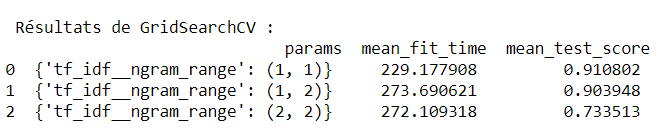

In [1]:
from IPython.display import Image
Image("capture.png")

The metric used here is the ROC AUC. We performed this GridSearchCV with our best model who is mentionned later.

We see that the bigram are longer and doesn't improve our model. That's why we prefer kept the unigrams.

We did a quick test to visualize which machine learning models are the most efficients to focus our efforts on the more interesting models. The metric used to decide between them are also the roc auc.

In [30]:
KFold = StratifiedKFold(n_splits=3, random_state=42)
scores = {}

def score_model(model):
    return cross_val_score(model, mots_tfidf, target_cat_train, scoring='roc_auc', cv = KFold)

#.todense()


# time: 10s
scores['tree'] = score_model(tree.DecisionTreeClassifier())

# time: 9s
scores['extra_tree'] = score_model(ensemble.ExtraTreesClassifier())

# time: 7s
scores['forest'] = score_model(ensemble.RandomForestClassifier())

# time: 33s
scores['ada_boost'] = score_model(ensemble.AdaBoostClassifier())

# time: 1min
scores['bagging'] = score_model(ensemble.BaggingClassifier())

# time: 2min30s
scores['grad_boost'] = score_model(ensemble.GradientBoostingClassifier())

# time: 49s
scores['ridge'] = score_model(linear_model.RidgeClassifier())

# time: 4s
scores['passive'] = score_model(linear_model.PassiveAggressiveClassifier())

# time: 4s
scores['sgd'] = score_model(linear_model.SGDClassifier())

# time: 3s
#scores['gaussian'] = score_model(naive_bayes.GaussianNB())

# time: 4min
scores['xgboost'] = score_model(xgb.XGBClassifier())

scores['LightGBM'] = score_model(LGBMClassifier())

scores['LinearSVC'] = score_model(LinearSVC())

scores['LR'] = score_model(LogisticRegression())

In [31]:
# Print the scores (with undersampling and 50k data)
model_scores = pd.DataFrame(scores).mean()
model_scores = model_scores.sort_values(ascending=False)
#model_scores.to_csv('model_scores.csv', index=False)
print('Model scores\n{}'.format(model_scores))

Model scores
sgd           0.898422
LR            0.896447
LightGBM      0.894173
LinearSVC     0.883829
ridge         0.877368
bagging       0.865869
passive       0.863637
forest        0.843882
extra_tree    0.840822
xgboost       0.830708
grad_boost    0.828707
ada_boost     0.808360
tree          0.753513
dtype: float64


*We notice that the most efficient models are : *
- SGDClassifier
- Logistic Regression
- LightGBM
- LinearSVC
- RidgeClassifier

*After we had done this first choice, we conducted some tuning parameters with GridSearchCV on each of this 5 models to determine the best parameters. We also conducted some cross validation to make a informed final choice on a specific model. It was found that SGDClassifier had the best result, both execution time and efficiency. For the sake of clarity, I will only put the result on our best model. *

To be more efficiently, we automated our preprocessing by creating a pipeline :

*NB* : We also created pipeline for our GridSearchCV, as well as for our cross validation to employ the same structure over and over wery quickly for each models. 

### Transformers and functions for our Pipeline

In [3]:
#STOPWORD

sw = set(stopwords.words('english'))
sw.update(("an'", "at'", "dn'", "en'", "he'", "it'", "ld'", "on'", "ou'", "sn'", "tn'", "i'd"))


#Transformater 1 to tokenize
class Extracteur_Mots(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.regexp = RegexpTokenizer("[a-z][a-z']{2,}")
    
    def fit(self, comments, y = None):
        return self
    
    def transform(self, comments, y = None):
        mots = []
        for c in comments:
            mots.append(self.regexp.tokenize(c.lower()))
        return mots
            
    
#function for stop_word  
def stop_words_filtering(words):
    res = []
    sw = set(stopwords.words('english'))
    sw.update(("an'", "at'", "dn'", "en'", "he'", "it'", "ld'", "on'", "ou'", "sn'", "tn'", "i'd"))
    for w in words:
        if w not in sw:
            res.append(w)
    return res

#Transformater 2 for stop_word whom use the function above
class Filtre_Mots(BaseEstimator, TransformerMixin):
    def __init__(self):
        return 
    
    def fit(self, mots, y = None):
        return self
    
    def transform(self, mots, y = None):
        for i in range(len(mots)):
            mots[i] = stop_words_filtering(mots[i])
        return mots
    
##Transformater 3 to stem
class Stemmer_Transformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.stemmer = EnglishStemmer()
        return 
    
    def fit(self, mots, y = None):
        return self
    
    def transform(self, mots, y = None):
        for i in range(len(mots)):
            for mot in mots[i]:
                self.stemmer.stem(mot)
        return mots 

#Transformater 4 to join 
class Transformer_join(BaseEstimator, TransformerMixin):
    def __init__(self):
        return 
    
    def fit(self, mots, y = None):
        return self
    
    def transform(self, mots, y = None):
        comments2 = []
        for m in mots:
            comments2.append(" ".join(m))
        return comments2

# III. Machine learning

The TfidfVectorizer's parameters, as well as those of SGDClassifier were chosen thanks to GridSearchCV that I will not put here for the sake of clarity.

In [5]:
# évaluation de notre meilleur modèle

#Sous-ensemble de data pour faire des tests plus rapidement
# Sous-échantillonnage sous Python 
pos_events = data[data.target > 0.5] # Accidents graves (événements positifs)
neg_events = data[data.target <= 0.5] # Accidents légers (événements négatifs)
#Permutation aléatoire des événements positifs et négatifs
pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
# Création des données sous-échantillonnées
taille = 144334
undersampled_data = pd.concat([neg_events.head(taille), pos_events.head(taille)])

from sklearn.model_selection import train_test_split
comments, comments_test, y_train, y_test = train_test_split(undersampled_data.comment_text, undersampled_data.target,
                                                            test_size=0.3, random_state=42)

target_cat_train = pd.cut(y_train, bins = 2, labels = ['non toxique', 'toxique'])

target_cat_test = pd.cut(y_test, bins = 2, labels = ['non toxique', 'toxique'])





my_pipe = Pipeline([('t1', Extracteur_Mots()),
                    ('t2', Filtre_Mots()),
                    ('t3', Stemmer_Transformer()),
                    ('t4', Transformer_join()),
                    ("tf_idf",TfidfVectorizer(analyzer = 'word', token_pattern = "[a-z][a-z']{2,}"
                                              , stop_words = sw, max_df = 0.8)),
                    ("classifier" , SGDClassifier(loss = 'modified_huber'
                                                  ,class_weight = {'toxique' : 2, 'non toxique' : 1}))])





my_pipe.fit(comments, target_cat_train)  # On entraîne le modèle sur le jeu de données train
predicted = my_pipe.predict(comments_test)



print(pd.crosstab(target_cat_test, predicted, rownames=['Classe réelle'], colnames=['Classe prédite']))

print()
print()

print(classification_report(target_cat_test, predicted))

print()
print()

print("score :", my_pipe.score(comments_test, target_cat_test))

probs = my_pipe.predict_proba(comments_test)

fpr, tpr, seuils = roc_curve(target_cat_test, probs[:,1], pos_label='toxique')

roc_auc = auc(fpr, tpr)

print("courbe roc :", roc_auc)

Classe prédite  non toxique  toxique
Classe réelle                       
non toxique           38476     4638
toxique                3998    28120


              precision    recall  f1-score   support

 non toxique       0.91      0.89      0.90     43114
     toxique       0.86      0.88      0.87     32118

   micro avg       0.89      0.89      0.89     75232
   macro avg       0.88      0.88      0.88     75232
weighted avg       0.89      0.89      0.89     75232



score : 0.8852084219481072
courbe roc : 0.9515534180892771


We notice that our results are better than decent. Moreover our model seems to predict both modality well, which is a very good thing. Regurlarly, when the data is unbalanced, the modality less present is wrongly predict. Here, we have managed to deal with this trouble with our undersampling (mostly).

To verify that our model generalize well, we will make a cross validation :

In [6]:
## Cross validation

my_pipe = Pipeline([('t1', Extracteur_Mots()),
                    ('t2', Filtre_Mots()),
                    ('t3', Stemmer_Transformer()),
                    ('t4', Transformer_join()),
                    ("tf_idf",TfidfVectorizer(analyzer = 'word', token_pattern = "[a-z][a-z']{2,}", stop_words = sw, max_df = 0.8)),
                    ("classifier" , SGDClassifier(loss = 'modified_huber', class_weight = {'toxique' : 2, 'non toxique' : 1}))])




my_pipe.fit(comments, target_cat_train)  # On entraîne le modèle sur le jeu de données train
predicted = my_pipe.predict(comments_test)




print(pd.DataFrame(cross_validate(my_pipe, comments,target_cat_train, scoring="roc_auc", cv= 5)))

    fit_time  score_time  test_score  train_score
0  98.410207   22.059028    0.951344     0.969882
1  88.897342   22.102948    0.951235     0.970032
2  92.313210   23.239909    0.949387     0.970055
3  93.755354   22.733226    0.952403     0.969922
4  91.904303   22.743248    0.949662     0.970522


We can notice our model generalize well with a result returning 5 time an AUC of approximately 0.95.
Moreover, our model doesn't seems to have a trouble with overfitting because our scores with the test set are almost equal with our score obtained with our train set.

# IV. Analyse des résultats

In [4]:
#Suppression des colonnes inutiles
data.drop(['created_date', 'parent_id', 'article_id', 'publication_id', 'rating', 'funny', 'wow', 'sad', 'likes', 'disagree', 'identity_annotator_count', 'toxicity_annotator_count'], axis = 1, inplace = True)

#On remplace NaN par 0
data.fillna(0, inplace = True)

# Ajout d'une colonne "présence d'une mention d'identité"

identity = data.iloc[:, 7:31].agg(sum, axis = 'columns')
data = pd.concat((data, identity), axis = 1).rename(columns = {0: 'identity'})

We conducted a analysis of our results obtained with our SGDClassifier.The aim is to focus our research on the words thaht our model seems misinterpret. For this, we will pay special attention on two prediction category : 

- The "false negative", that's means the comments forecasted as not toxic and turned to be toxic. Therefore, they are  "false not toxic" alias "false negative".

- The "false positive", that's means the comments forecasted as toxic and turned to be not toxic. Therefore, they are  "false toxic" alias "false positive".

Alongside these two categories, we will examine the most frequently words and then try to visualize what might enhance our model.

For now, we are relauching our model to obtain our prediction ( we will put our sample's size lower because for lack of memory when processing the WorkClouds).

In [11]:
#Sous-ensemble de data pour faire des tests plus rapidement
# Sous-échantillonnage sous Python 
pos_events = data[data.target >= 0.5] # Accidents graves (événements positifs)
neg_events = data[data.target < 0.5] # Accidents légers (événements négatifs)
#Permutation aléatoire des événements positifs et négatifs
pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
# Création des données sous-échantillonnées
taille = 100000
undersampled_data = pd.concat([neg_events.head(taille), pos_events.head(taille)])

from sklearn.model_selection import train_test_split
comments, comments_test, y_train, y_test = train_test_split(undersampled_data.comment_text, undersampled_data.target,
                                                            test_size=0.3, random_state=42)

target_cat_train = pd.cut(y_train, bins = 2, labels = ['non toxique', 'toxique'])

target_cat_test = pd.cut(y_test, bins = 2, labels = ['non toxique', 'toxique'])





my_pipe = Pipeline([('t1', Extracteur_Mots()),
                    ('t2', Filtre_Mots()),
                    ('t3', Stemmer_Transformer()),
                    ('t4', Transformer_join()),
                    ("tf_idf",TfidfVectorizer(analyzer = 'word', token_pattern = "[a-z][a-z']{2,}"
                                              , stop_words = sw, max_df = 0.8)),
                    ("classifier" , SGDClassifier(loss = 'modified_huber', class_weight = {'toxique' : 2, 'non toxique' : 1}))])





my_pipe.fit(comments, target_cat_train)  # On entraîne le modèle sur le jeu de données train
predicted = my_pipe.predict(comments_test)

Now we have our prediction, we can create our two categories described above.

In [12]:
#False negative comments
indices_fauxneg = comments_test.index[[True if ((target_cat_test.iloc[i] == 'toxique') & (predicted[i] == 'non toxique')) else False for i in range(len(predicted))]]
comments_fauxneg = data.loc[indices_fauxneg, 'comment_text']
#False positive comments
indices_fauxpos = comments_test.index[[True if ((target_cat_test.iloc[i] == 'non toxique') & (predicted[i] == 'toxique')) else False for i in range(len(predicted))]]
comments_fauxpos = data.loc[indices_fauxpos, 'comment_text']

In [13]:
my_pipe = Pipeline([('t1', Extracteur_Mots()),
                    ('t2', Filtre_Mots()),
                    ('t3', Stemmer_Transformer()),
                    ('t4', Transformer_join())])

my_pipe.fit(comments_test)

#BOW faux négatifs
words_fauxneg = " ".join(my_pipe.transform(comments_fauxneg))
#print(words_fauxneg)
#BOW faux positifs
words_fauxpos = " ".join(my_pipe.transform(comments_fauxpos))

Once these two categories created, we can perform two WorkClouds to visualize the most influent words in the "false toxic" and the "false not toxic".

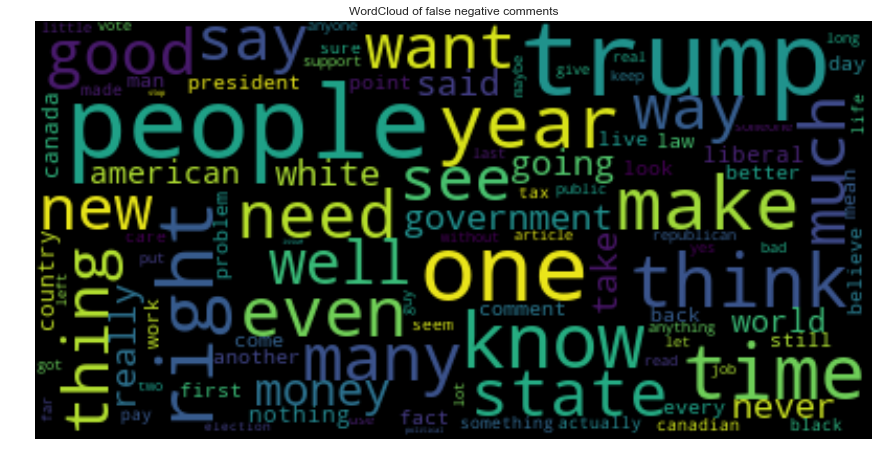

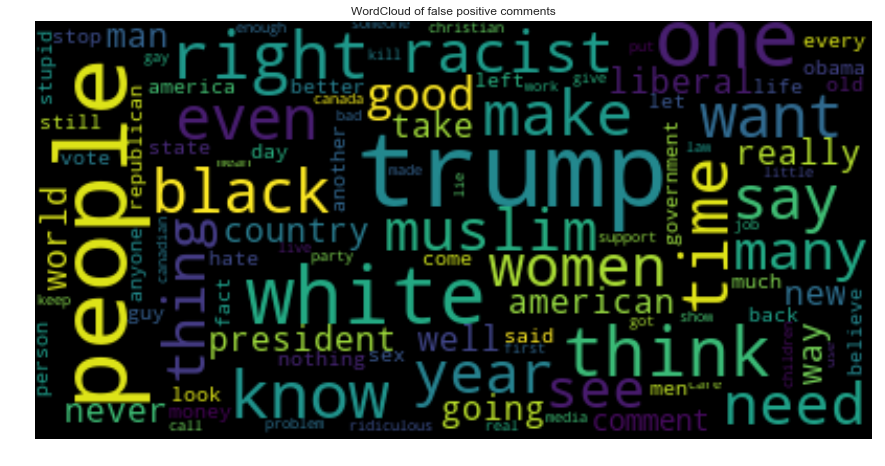

In [14]:
from wordcloud import WordCloud

plt.figure(figsize = (15,20))
wc = WordCloud(collocations = False, max_words = 100, max_font_size=50)
wc.generate(words_fauxneg)
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud of false negative comments')
plt.axis("off");

plt.figure(figsize = (15,20))
wc = WordCloud(collocations = False, max_words = 100, max_font_size=50)
wc.generate(words_fauxpos)
plt.imshow(wc, interpolation='bilinear')
plt.title('WordCloud of false positive comments')
plt.axis("off");

These two WorkCloud may provide us which words deserve special attention. But we rather focus on a histogram because the notion of quantity remaine quite abstract on a WorkCloud.

In [15]:
# Calcul de la fréquence dans les mal classés par rapport à la fréquence générale (ratio)

#construction du dictionnaire {mot, fréquences du mot} dans l'ensemble des commentaires
words_total = " ".join(my_pipe.transform(comments_test)).split() #liste de tous les mots
words_unique, words_counts = np.unique(words_total, return_counts = True) #liste des mots uniques, liste de leur nb
words_total_len = len(words_total)


words_freq = words_counts / words_total_len #liste des frequences des mots
dico_total = dict(zip(words_unique, words_freq))

#construction du dictionnaire {mot, fréquences du mot} dans les faux négatifs
fauxneg_list = words_fauxneg.split() #liste de tous les mots
fauxneg_list_len = len(fauxneg_list)
fauxneg_unique, fauxneg_counts = np.unique(fauxneg_list, return_counts = True) #liste des mots uniques, liste de leur nb
fauxneg_freq = fauxneg_counts / len(fauxneg_list) #liste des frequences des mots


dico_fauxneg1 = dict(zip(fauxneg_unique, fauxneg_freq))
#On enlève les "stopwords" présents dans moins de 5 commentaires
freqsw = 5 / fauxneg_list_len
dico_fauxneg = {}
for word in dico_fauxneg1.keys():
    if dico_fauxneg1[word] > freqsw:
        dico_fauxneg[word] = dico_fauxneg1[word]



#construction du dictionnaire {mot, fréquences du mot} dans les faux positifs
fauxpos_list = words_fauxpos.split() #liste de tous les mots
fauxpos_unique, fauxpos_counts = np.unique(fauxpos_list, return_counts = True) #liste des mots uniques, liste de leur nb
fauxpos_freq = fauxpos_counts / len(fauxpos_list) #liste des frequences des mots
dico_fauxpos1 = dict(zip(fauxpos_unique, fauxpos_freq))
dico_fauxpos = {}
for word in dico_fauxpos1.keys():
    if dico_fauxpos1[word] > freqsw:
        dico_fauxpos[word] = dico_fauxpos1[word]


#construction du dictionnaire {mot, ratiofreq} dans les faux négatifs
dico_fauxneg_ratio = {}
for mot in dico_fauxneg.keys():
    dico_fauxneg_ratio[mot] = dico_fauxneg[mot] / dico_total[mot]

    
#construction du dictionnaire {mot, ratiofreq} dans les faux positifs
dico_fauxpos_ratio = {}
for mot in dico_fauxpos.keys():
    dico_fauxpos_ratio[mot] = dico_fauxpos[mot] / dico_total[mot]    

#Tri des dictionnaires : construction des listes de mots les plus fréquents
fauxneg_sorted = sorted(dico_fauxneg_ratio, key = dico_fauxneg_ratio.__getitem__, reverse = True)
fauxpos_sorted = sorted(dico_fauxpos_ratio, key = dico_fauxpos_ratio.__getitem__, reverse = True)

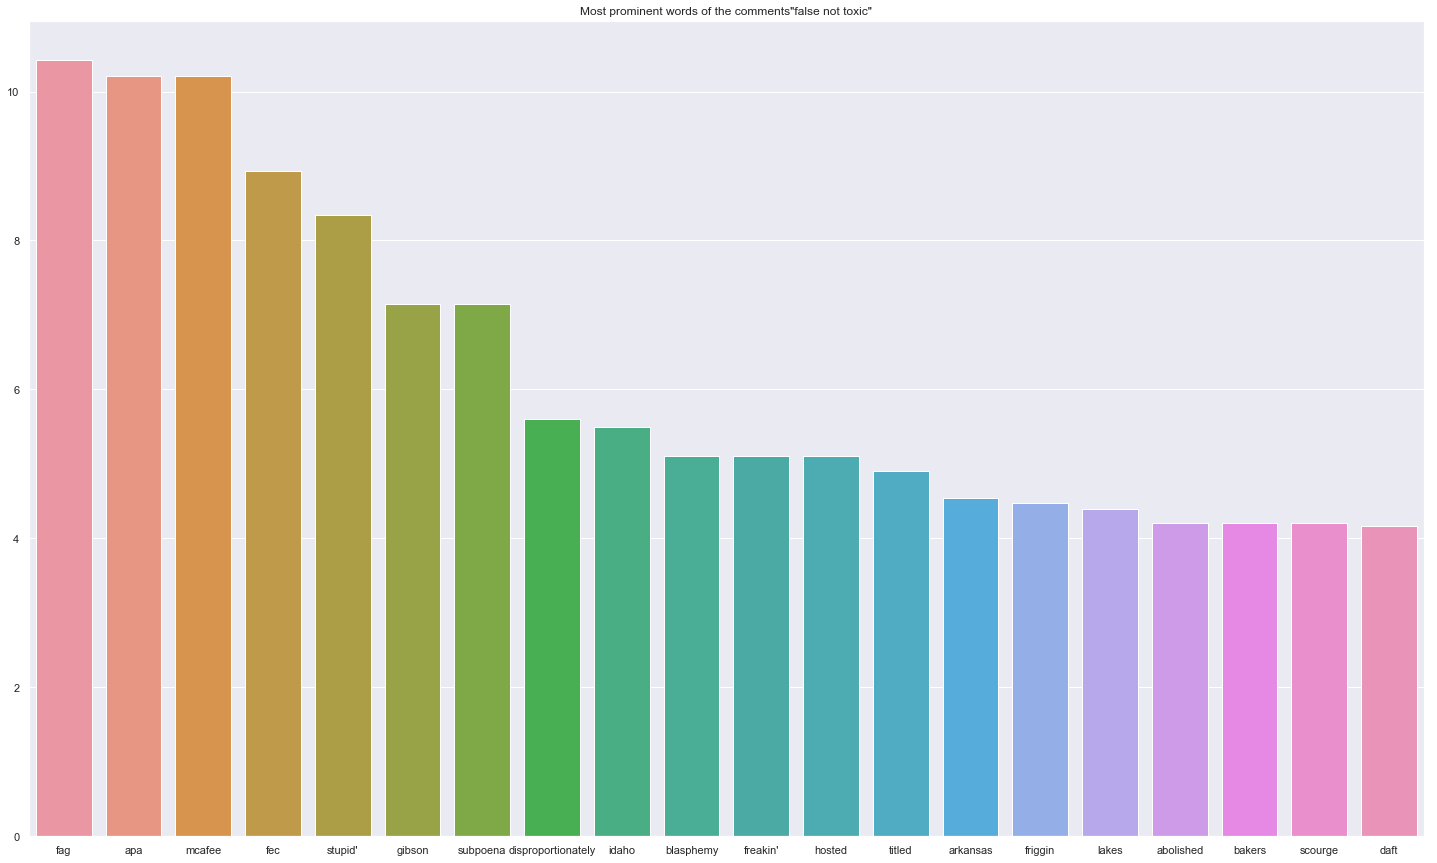

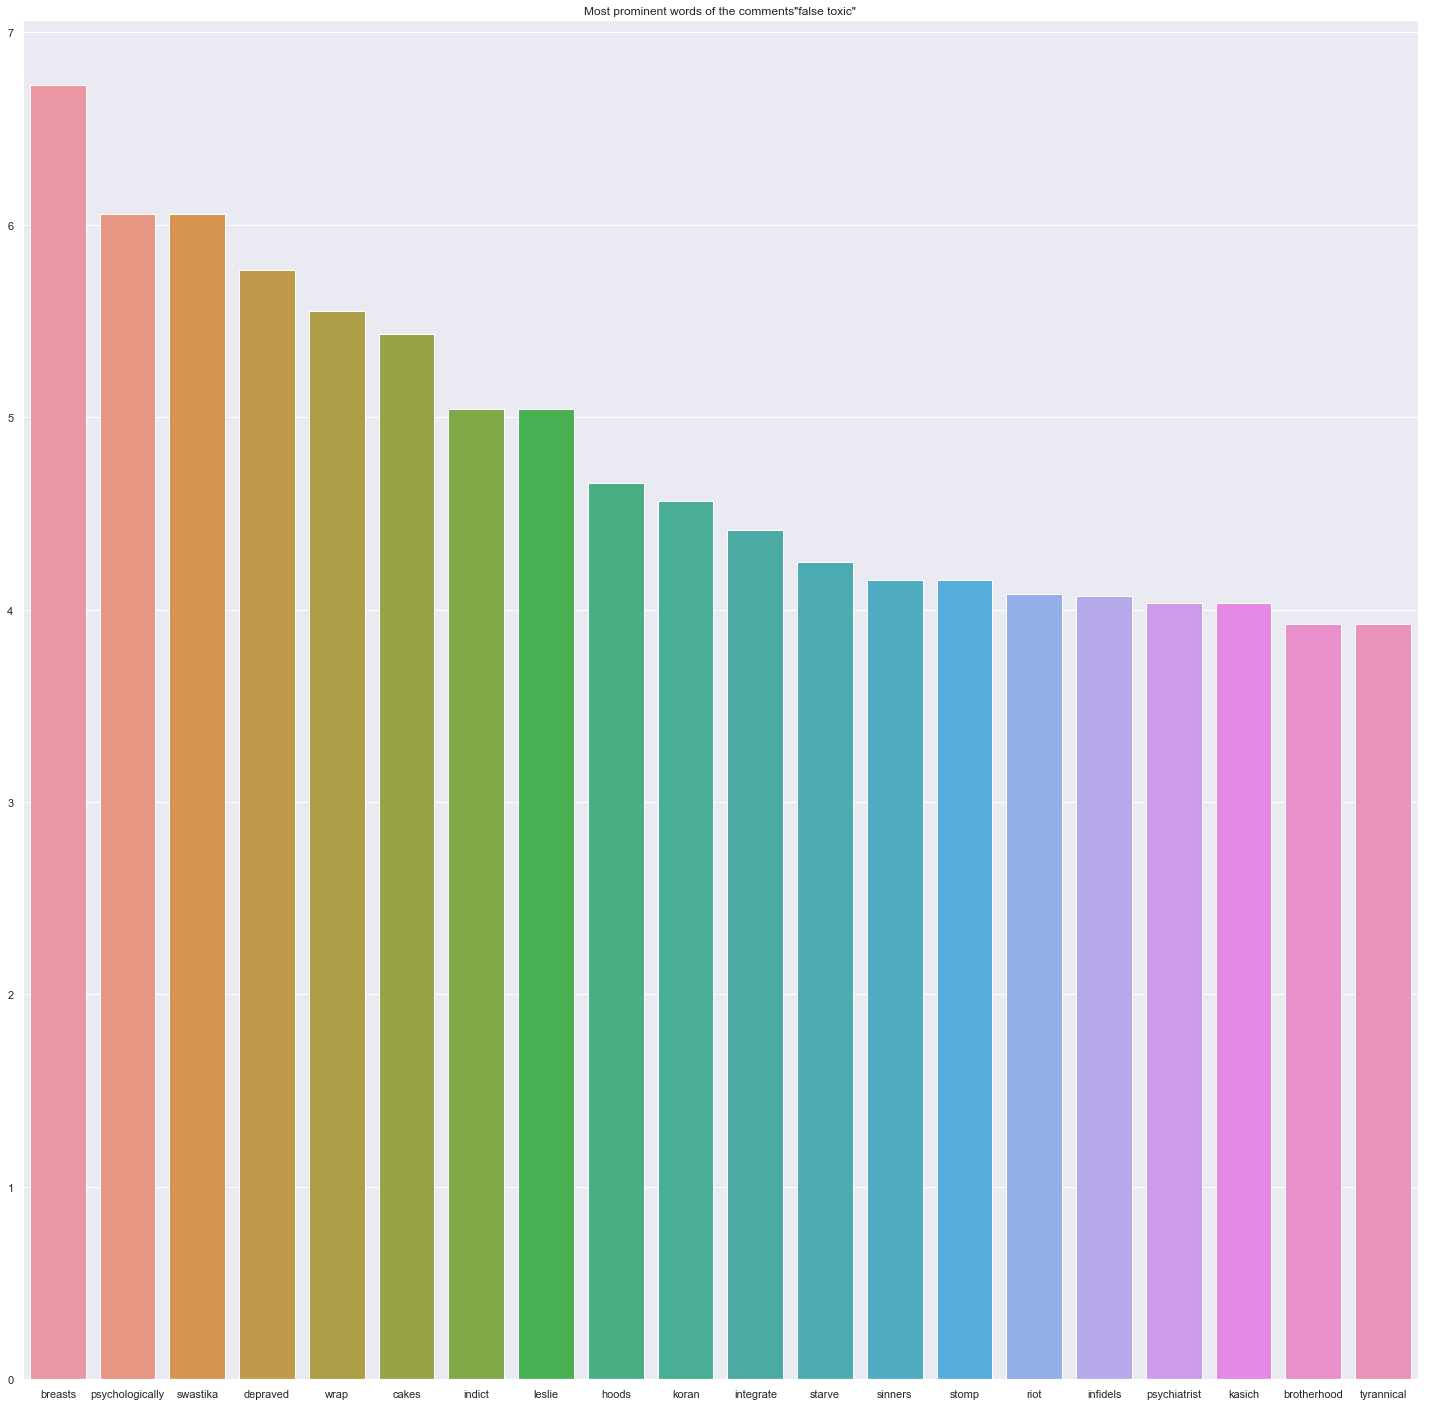

In [16]:
#Histogrammes des mots les plus saillants pour chaque catégorie de mal classés (ratio de fréquences)

#Sous-ensemble des 'nbmots' mots les plus saillants
plt.figure(figsize = (25,15))
nbmots = 20
fauxneg_x = fauxneg_sorted[:nbmots]
fauxneg_y = [dico_fauxneg_ratio[mot] for mot in fauxneg_x]
sns.barplot(fauxneg_x, fauxneg_y)
plt.title("Most prominent words of the comments\"false not toxic\"");


#Sous-ensemble des 'nbmots' mots les plus saillants
plt.figure(figsize = (25,25))
nbmots = 20
fauxpos_x = fauxpos_sorted[:nbmots]
fauxpos_y = [dico_fauxpos_ratio[mot] for mot in fauxpos_x]
sns.barplot(fauxpos_x, fauxpos_y)
plt.title("Most prominent words of the comments\"false toxic\"");

# V. Web development

In order to have a concret and prompt outcome, we created a website to ensure that our model is useable by everyone.

I will share in our Github all the necessary files required fro creating it (app.py, templates, home and so on..)

There is the website where our model has been implemented : https://polar-falls-57052.herokuapp.com/

And below, I put the serializer done with joblib for those who might be interested :

In [ ]:
#All the package required to serialize

import pandas as pd
import numpy as np
from sklearn.externals import joblib
from nltk.tokenize import word_tokenize
from nltk.tokenize.regexp import RegexpTokenizer
from nltk.stem.snowball import EnglishStemmer
from sklearn.model_selection import train_test_split
import sklearn.model_selection as ms
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import tree
from sklearn import metrics
from sklearn import ensemble
from sklearn import linear_model 
from sklearn import naive_bayes 
import nltk
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator
from sklearn.base import TransformerMixin
from sklearn.pipeline import FeatureUnion
from sklearn.linear_model import RidgeClassifier
from sklearn.linear_model import SGDClassifier

from transfo import Extracteur_Mots, stop_words_filtering, Filtre_Mots, Stemmer_Transformer,  Transformer_join


Pipelines and Joblib have a hard time to cohabit, it appears that many people had difficulty to put on a website models built via pipeline. I took my inspiration from this article to deal with this issue : https://rebeccabilbro.github.io/module-main-has-no-attribute/

It seems that the key solution would be to create a file .py and put all the transformers required for our pipeline in here in order to charge them in our serializer and our app.py.

That's what I've done, I created a transfo.py and put all my transformers there, that's why this line is here :

- from transfo import Extracteur_Mots, stop_words_filtering, Filtre_Mots, Stemmer_Transformer,  Transformer_join

In [ ]:
#Import of the data

data = pd.read_csv('train.csv')
data = data.set_index('id')

In [ ]:
#Sous-ensemble de data pour faire des tests plus rapidement
# Sous-échantillonnage sous Python 
pos_events = data[data.target > 0.5] # Accidents graves (événements positifs)
neg_events = data[data.target <= 0.5] # Accidents légers (événements négatifs)
#Permutation aléatoire des événements positifs et négatifs
pos_events = pos_events.reindex(np.random.permutation(pos_events.index))
neg_events = neg_events.reindex(np.random.permutation(neg_events.index))
# Création des données sous-échantillonnées
taille = 144334
undersampled_data = pd.concat([neg_events.head(taille), pos_events.head(taille)])

from sklearn.model_selection import train_test_split
comments, comments_test, y_train, y_test = train_test_split(undersampled_data.comment_text, undersampled_data.target,
                                                            test_size=0.3)

target_cat_train = pd.cut(y_train, bins = 2, labels = ['non toxique', 'toxique'])

target_cat_test = pd.cut(y_test, bins = 2, labels = ['non toxique', 'toxique'])

In [ ]:
sw = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're",
      "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he',
      'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it',
      "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves',
      'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those',
      'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
      'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if',
      'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with',
      'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after',
      'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over',
      'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where',
      'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other',
      'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too',
      'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've",
      'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn',
      "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn',
      "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't",
      'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn',
      "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn',
      "wouldn't", "an'", "at'", "dn'", "en'", "he'", "it'", "ld'", "on'", "ou'", "sn'", "tn'", "i'd"]
sw = set(sw)

In [ ]:
my_pipe = Pipeline([('t1', Extracteur_Mots()),
                    ('t2', Filtre_Mots()),
                    ('t3', Stemmer_Transformer()),
                    ('t4', Transformer_join()),
                    ("tf_idf",TfidfVectorizer(analyzer = 'word', token_pattern = "[a-z][a-z']{2,}",
                                              stop_words = sw, max_df = 0.8)),
                    ("classifier" , SGDClassifier(loss = 'modified_huber', class_weight = {'toxique' : 2, 'non toxique' : 1}))])





my_pipe.fit(comments, target_cat_train)  # On entraîne le modèle sur le jeu de données train

In [ ]:
# save the model to disk
joblib.dump(my_pipe,'final_pipeline.joblib')

And here it is, our serialized model, ready for use in an app.py :)